In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
df=pd.read_csv('/content/tesla.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [ ]:
#get the no of rows and col in dataset
df.shape

(2193, 7)

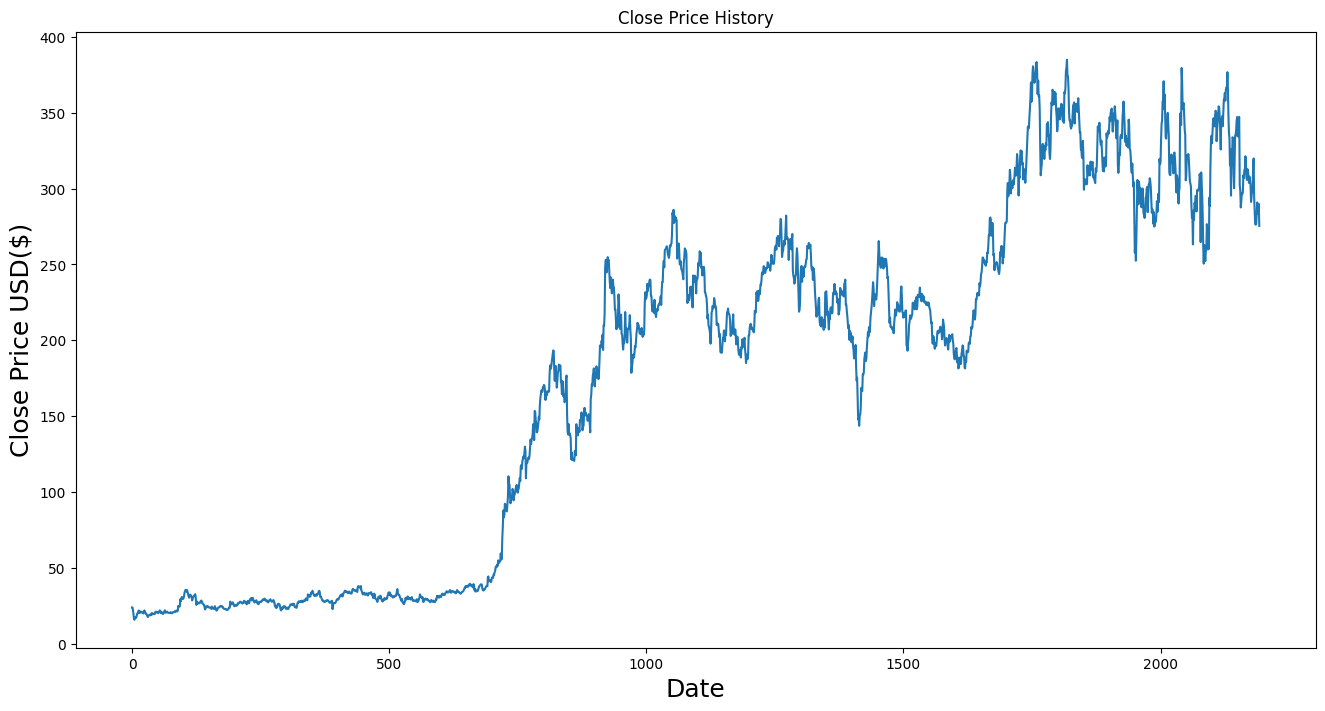

In [ ]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
#create a new datafrome with only close column
data=df.filter(['Close'])
#convert the dataframe to a numpy array
dataset=data.values
#get no of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.7)

training_data_len

1536

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.73986996],
       [0.74257852],
       [0.70322317]])

In [ ]:
#create training data set
#create scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1476, 60, 1)

In [ ]:
#build LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1476/1476 [==============================] - 15s 8ms/step - loss: 0.0014


In [ ]:
model.save('keras_model.h5')

In [ ]:
#create testing dataset
#create new array containing scaled values from 1695 to 2193
test_data=scaled_data[training_data_len-60: , :]

#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 4ms/step


In [ ]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.8463350304072135

<ipython-input-47-2e9cc56b0d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


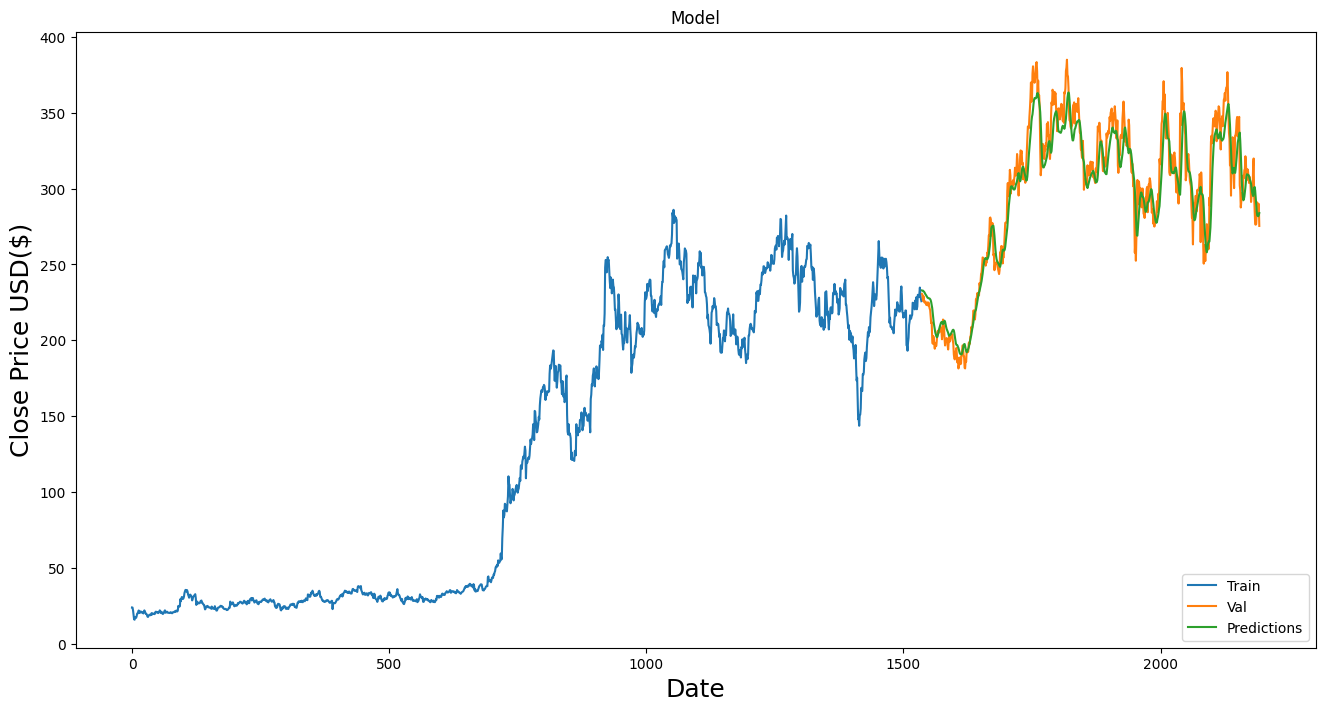

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
1536,230.610001,232.885559
1537,230.029999,232.768860
1538,226.160004,232.774445
1539,229.080002,232.318832
1540,225.649994,232.114395
...,...,...
2188,290.920013,282.338776
2189,283.359985,282.033142
2190,288.959991,281.832947
2191,289.959991,282.610016


In [ ]:
#get the quote
tesla_quote=pd.read_csv('/content/tesla.csv')
#create a new data frame
new_df=tesla_quote.filter(['Close'])
#get the last 60 day closing price values and convert dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values b/w 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test dataset to numpy array
X_test=np.array(X_test)
#reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 52ms/step
[[283.23907]]
